In [1]:
# Data locations
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\GNPS_library_searches\\"
PATH_SAVE_MODEL = ROOT + "\\SeSiMe\\models_trained\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

# Import general packages
import sys
sys.path.insert(0, PATH_SESIME)

import helper_functions as functions
import MS_functions
import numpy as np

# Dataset 1: gnps search (Justin, 2018-03-23)
+ Spectral libraries search (to get spectra): https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=6e22f85aeb0744208e872d1640f508d9
+ Library matching (to get metadata): https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=03fba62d93cb4cbfa3f72106d18f7d2c

In [2]:
# data locations
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA"
PATH_MS_DATA = ROOT + "\\Data\\GNPS_library_searches\\"
PATH_SAVE_MODEL = ROOT + "\\SeSiMe\\models_trained\\"
PATH_SAVE_DATA = ROOT + "\\SeSiMe\\data\\"
PATH_SESIME = ROOT + "\\SeSiMe\\"

#PATH_NPLINKER = ROOT + "\\nplinker\\prototype\\"
mgf_file = PATH_MS_DATA + "METABOLOMICS-SNETS-6e22f85a-download_clustered_spectra-main.mgf"

### Plotting function (to visualy inspect two spectra)

In [50]:
from matplotlib import pyplot as plt

def compare_spectra(spec1, spec2, min_mz = None, max_mz = None):
    """ Plot different spectra together to compare.
    """
    plt.figure(figsize=(10,10))

    peak_number = []
    new_min_mz = 9999
    new_max_mz = 0
    colors = ['crimson', 'teal']
    for i, spec in enumerate([spec1, spec2]):
        peaks = np.array(spec.peaks.copy())
        peak_number.append(len(peaks))
        peaks[:,1] = peaks[:,1]/np.max(peaks[:,1]); 

        if new_min_mz > np.min(peaks[:,0]):
            new_min_mz = np.min(peaks[:,0])
        if new_max_mz < np.max(peaks[:,0]):
            new_max_mz = np.max(peaks[:,0])

        markerline, stemlines, baseline = plt.stem(peaks[:,0], (-1)**(i+1)*peaks[:,1], linefmt='-', markerfmt='.', basefmt='r-')
        plt.setp(stemlines, 'color', colors[i])
    
    if min_mz == None: #then update
        min_mz = max(0, (new_min_mz - 5))
    if max_mz == None: #then update
        max_mz = new_max_mz + 10
        
    plt.xlim((min_mz, max_mz))
    plt.grid(True)
    plt.title('Spectrum')
    plt.xlabel('m/z')
    plt.ylabel('peak intensity')
    
    plt.show()
    
    print("Number of peaks: ", peak_number)

### Madeleine's script to create MGF for unique_smiles

In [182]:
"""
Created on Fri Nov  9 10:23:22 2018
@author: madeleineernst
"""
#############################################################################################################
#                                                                                                           #
#  compile .mgf file of unique InChIKeys and associated MS/MS spectra retrieved from GNPS Libraries         #
#                                                                                                           #
#############################################################################################################

from pyteomics import mgf, auxiliary
import pandas as pd
import numpy as np

# load GNPS library matches downloaded from https://gnps.ucsd.edu/ProteoSAFe/status.jsp?task=03fba62d93cb4cbfa3f72106d18f7d2c
lib = pd.read_csv(PATH_MS_DATA + "MOLECULAR-LIBRARYSEARCH-03fba62d-view_all_annotations_DB-main.tsv", sep = "\t")
# load SMILES and associated InChIKeys 
# SMILES were converted to InChIKeys using Marvin Beans MolConverter: https://chemaxon.com/marvin-archive/3.3.3/marvin/doc/user/molconvert.html
smiles = pd.read_csv(PATH_MS_DATA + "SMILES_GNPSLibraries.csv",sep=',', index_col = 0)
ikeys = pd.read_csv(PATH_MS_DATA + "InchiKeys_GNPSLibraries.txt",  sep='\t',header = None)

lib = lib.dropna(subset=['Smiles'])  
lib = lib[lib.Smiles != ' ']
lib['Smiles'] = lib['Smiles'].str.strip() # remove white spaces

ikeys = [j for i in ikeys.values.tolist() for j in i]
ikeys = [w.replace('InChIKey=', '') for w in ikeys]
smiles["inchikey"] = ikeys
smiles = smiles.rename(columns = {'SMILES':'Smiles'})
smiles = smiles.drop_duplicates(subset=['Smiles']) 

libcomb = pd.merge(lib, smiles,how="left",on="Smiles")
libcomb = libcomb.dropna(subset=['inchikey'])
libcomb = libcomb.drop_duplicates(subset='inchikey', keep='first', inplace=False) # remove duplicate InChIKeys

C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [189]:
len(smiles.values[:,0]), len(list(set(smiles.values[:,0])))

(12969, 12969)

In [190]:
smiles.head()

,Smiles,inchikey
0,C1CNCCN1,GLUUGHFHXGJENI-UHFFFAOYSA-N
1,COC(=O)C1=CO[C@@H](C)[C@@H]2CN(CCc3c[nH]c4cccc...,NYNOIMNCLKTWCG-WBAXXEDZSA-N
2,O=C1C2=C(O)C=C(O)C=C2O[C@H](C3=CC(O)=C(O)C=C3)...,CXQWRCVTCMQVQX-LSDHHAIUSA-N
3,Nc1ncnc2n(cc(c3ccc(Oc4ccccc4)cc3)c12)C5CCCC5,FMETVQKSDIOGPX-UHFFFAOYSA-N
4,C(C8=O)([H])(N(C2=O)C(C(N87)(C([H])([H])C([H])...,HEFIYUQVAZFDEE-UHFFFAOYSA-N


In [193]:
len(set(libcomb['#Scan#'].values))

11134

In [4]:
libcomb.head()

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags,internalFilename,inchikey
0,37597,M+H,NaN,1,MLS002172445-01!BRL 15572,NIH Pharmacologically Active Library,VP/LMS,406.181,spectrapklbin/spec-00000.mgf37597,NaN,...,OC(CN1CCN(CC1)c2cccc(Cl)c2)C(c3ccccc3)c4ccccc4.Cl,1,407.192,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000085886,3533120.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,KQGJIKWDFWLCHO-UHFFFAOYSA-N
1,88458,M+H,NaN,1,"MLS001032355-01!N-pyridin-3-yl-2-[(4,8,8-trime...",NIH Natural Product Library,VVP/LMS,394.153,spectrapklbin/spec-00000.mgf88458,NaN,...,Cc1cc(=O)oc2c3CCC(C)(C)Oc3cc(OCC(=O)Nc4cccnc4)c12,1,395.161,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000079962,2097800.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,LVQGEYGJUNSKKW-UHFFFAOYSA-N
2,88090,M+H,NaN,1,"MLS001158282-01!(2S)-2-[[(2S)-2-(1,2-dihydroim...",NIH Natural Product Library,VVP/LMS,463.222,spectrapklbin/spec-00000.mgf88090,NaN,...,CC(C)C[C@H](NC(=O)N1CCn2c1nc3ccccc23)C(=O)N[C@...,1,464.230,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000079592,2165400.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,RWSJPESCUJCQNS-PMACEKPBSA-N
3,37673,M+H,NaN,1,"MLS000701320-01!N-(4,5-diphenyl-1H-pyrazolo[3,...",NIH Pharmacologically Active Library,VP/LMS,406.154,spectrapklbin/spec-00000.mgf37673,NaN,...,O=C(Nc1[nH]nc2nnc(c3ccccc3)c(c4ccccc4)c12)Nc5c...,1,407.160,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000085962,3356090.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,BUUXBIIFLQVFAR-UHFFFAOYSA-N
4,37985,[M+H],"150322-43-3, 389574-19-0 (HCl), 389574-20-3 (M...",1,Prasugrel (Effient),Commercial,Garg_Neha,373.115,spectrapklbin/spec-00000.mgf37985,NaN,...,C(C(C1C(=CC=CC=1)F)N2CCC3=C(C2)C=C(S3)OC(=O)C)...,1,374.122,METABOLOMICS-SNETS-6e22f85a-download_clustered...,CCMSLIB00000078073,3051020.0,UPDATE-SINGLE-ANNOTATED-GOLD,,spec-00000.mgf,DTGLZDAWLRGWQN-UHFFFAOYSA-N


In [28]:
libcomb.loc[libcomb['#Scan#'] == 33238]

,#Scan#,Adduct,CAS_Number,Charge,Compound_Name,Compound_Source,Data_Collector,ExactMass,FileScanUniqueID,INCHI,...,Smiles,SpecCharge,SpecMZ,SpectrumFile,SpectrumID,TIC_Query,UpdateWorkflowName,tags,internalFilename,inchikey


## How to deal with '-1+' charge ?
I checked part of the metadata and "CHARGE=-1+" seems to actually mean "CHARGE=-1". So, in the following I will simply replace it in the mgf file.

In [25]:
import fileinput

with fileinput.FileInput(mgf_file, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace('-1+', '-1'), end='')

In [212]:
# modified code from madeleine -> sped up mostly
#scans = libcomb['#Scan#'].tolist() #libcomb.Scan.tolist()
scans = libcomb['#Scan#'].tolist()

mgf_file = PATH_MS_DATA + "METABOLOMICS-SNETS-6e22f85a-download_clustered_spectra-main.mgf"

counter=0
with mgf.read(mgf_file) as reader:
    for i, spectrum in enumerate(reader):
        if i/10000 == i//10000: #show progress
            print("being at ",i, "of ", len(reader), "spectra.")
            
        if int(spectrum['params']['scans']) in scans:
            idx = scans.index(int(spectrum['params']['scans']))
            scan = scans[idx]
            if spectrum['params']['scans'] == str(scan):
                file_name = '{}.mgf'.format(PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs_2")
                spectrum['params']['SMILES'] = libcomb.Smiles.tolist()[idx]
                spectrum['params']['InchiKey'] = libcomb.inchikey.tolist()[idx]
                counter+=1
                spectrum['params']['FEATURE_ID'] = counter
                mgf.write((spectrum,), file_name)

being at  0 of  107238 spectra.
being at  10000 of  107238 spectra.
being at  20000 of  107238 spectra.
being at  30000 of  107238 spectra.
being at  40000 of  107238 spectra.
being at  50000 of  107238 spectra.
being at  60000 of  107238 spectra.
being at  70000 of  107238 spectra.
being at  80000 of  107238 spectra.
being at  90000 of  107238 spectra.
being at  100000 of  107238 spectra.


In [213]:
# Import / Load data from dataset
results_file = "filtered_data_JustinLibrarySearch_minpeak10_loss500_2dec_exp001.json"
mgf_file = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf"

spectra_ref, spectra_dict_ref, MS_documents_ref, MS_documents_intensity_ref, sub_spectra_metadata_ref = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 5.0, max_loss = 500.0,
                 min_intensity_perc = 0,
                 exp_intensity_filter = 0.01,
                 min_peaks = 10,
                 max_peaks = None,
                 peaks_per_mz = 15/200,
                 peak_loss_words = ['peak_', 'loss_'])

Could not find file  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\SeSiMe\data\ filtered_data_JustinLibrarySearch_minpeak10_loss500_2dec_exp001.json
Data will be imported from  C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\Data\GNPS_library_searches\GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf
RuntimeError for  77  peaks. Use mean intensity as threshold.
RuntimeError for  54  peaks. Use mean intensity as threshold.
Unclear TypeError for  100  peaks. Use mean intensity as threshold.
[] and y:  []
RuntimeError for  123  peaks. Use mean intensity as threshold.
RuntimeError for  92  peaks. Use mean intensity as threshold.


C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\OneDrive - Netherlands eScience Center\Project_Wageningen_iOMEGA\SeSiMe\MS_functions.py:345: RuntimeWarning: overflow encountered in multiply
  return a*np.exp(-b*x)
C:\Users\FlorianHuber\Anaconda3\envs\SeSiMe\lib\site-packages\scipy\optimize\minpack.py:780: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq


Take  9565 spectra out of  11134 .
  Created documents for  1000  of  9565  spectra.No losses detected for:  1035 1040
No losses detected for:  1047 1052
No losses detected for:  1074 1079
  Created documents for  1200  of  9565  spectra.No losses detected for:  1237 1242
No losses detected for:  1277 1282
  Created documents for  1300  of  9565  spectra.No losses detected for:  1339 1344
No losses detected for:  1395 1400
  Created documents for  1500  of  9565  spectra.No losses detected for:  1570 1575
  Created documents for  1800  of  9565  spectra.No losses detected for:  1849 1855
  Created documents for  1900  of  9565  spectra.No losses detected for:  1936 1942
  Created documents for  2100  of  9565  spectra.No losses detected for:  2107 2113
No losses detected for:  2115 2121
No losses detected for:  2127 2133
No losses detected for:  2190 2196
  Created documents for  2200  of  9565  spectra.No losses detected for:  2218 2224
No losses detected for:  2219 2225
  Created doc

---
# Dataset 2: all gnps library selection
+ Check notebook: SeSiMe_MS_gnps_search_libraries.ipynb
+ About 77,000 spectra

### Replace '-1+' by '-1'

In [64]:
input_file = ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010.mgf"
output_file = open(ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010_modified.mgf", 'w')

with open(input_file, 'r') as file:
    for line in file:
        #line = file.readline()
        output_file.write(line.replace('-1+', '-1'))

In [6]:
results_file = "filtered_data_LibrariesAllSmiles_minpeak10_loss500_2dec_exp001.json"
mgf_file = ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010_modified.mgf"

spectra, spectra_dict, MS_documents, MS_documents_intensity, sub_spectra_metadata = MS_functions.load_MGF_data(PATH_SAVE_DATA,
                  mgf_file, 
                 results_file = results_file,
                 num_decimals = 2,
                 min_frag = 0.0, max_frag = 1000.0,
                 min_loss = 5.0, max_loss = 500.0,
                 min_intensity_perc = 0,
                 exp_intensity_filter = 0.01, #None
                 min_peaks = 10,
                 max_peaks = None,
                 peaks_per_mz = 15/200,
                 peak_loss_words = ['peak_', 'loss_'])

Spectra json file found and loaded.


In [215]:
len(spectra), len(spectra_ref)

(56102, 9565)

# Compare dataset and find overlap

### Find matches based on pepmass (+ cosine score)

In [216]:
# Compare allGNPS and uniquesmiles MGFs
decimals = 2

pepmasses = []
for spec in spectra_ref:
    pepmasses.append(spec.metadata['pepmass'][0])

target_mz = np.array(pepmasses)
target_mz  = np.round(target_mz, decimals)

pepmasses = []
for spec in spectra:
    pepmasses.append(spec.metadata['pepmass'][0])

allGNPS_mz = np.array(pepmasses)
allGNPS_mz  = np.round(allGNPS_mz, decimals)

### Machtes for equal pepmass (within 2 decimals) and cosine score > 0.7):

In [217]:
decimals = 2
cosine_threshold = 0.7
cosine_tol = 0.01

find_precursor_matches = []
find_precursor_matches_confirmed = []
find_precursor_matches_not_confirmed = []
find_target_matched = np.zeros((len(spectra)))

for i, pepmass in enumerate(target_mz):
    found_ones = np.where(allGNPS_mz == np.round(pepmass, decimals))[0]
    found_match = 0
    if len(found_ones) > 0:
        for one in found_ones:
            cosine_score = MS_functions.cosine_score(spectra_ref[i], spectra[one], tol = cosine_tol)[0]
            if cosine_score > cosine_threshold:
                found_match = 1
                find_precursor_matches_confirmed.append((i, one, cosine_score))
            else:
                find_precursor_matches_not_confirmed.append((i, one, cosine_score))
    else:
        pass
    find_precursor_matches.append(found_match)

print("Found spectra matches for", np.sum(np.array(find_precursor_matches)), "out of", len(spectra_ref), "spectra.")
found_IDX = np.where(np.array(find_precursor_matches) == 1)

print("Found total of", len(find_precursor_matches_confirmed), "cosine score confirmed matches.")

Found spectra matches for 6417 out of 9565 spectra.
Found total of 13189 cosine score confirmed matches.


## Further inspect samples...

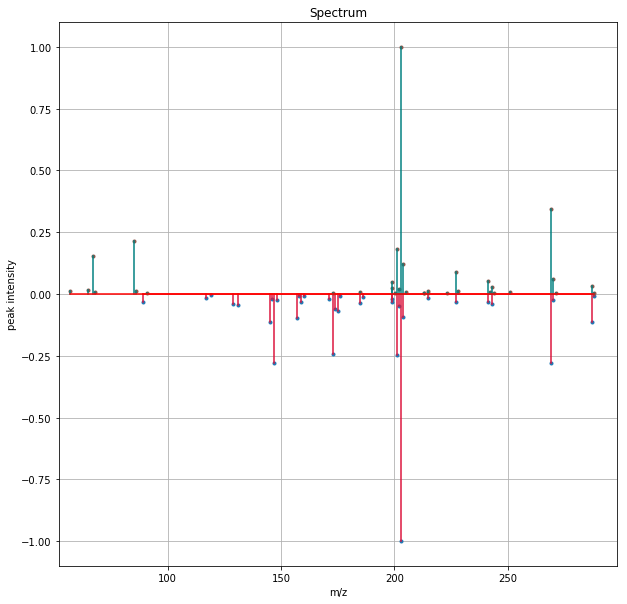

Number of peaks:  [34, 34]


In [218]:
id = 0
ID1, ID2 = find_precursor_matches_confirmed[id][:2]

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

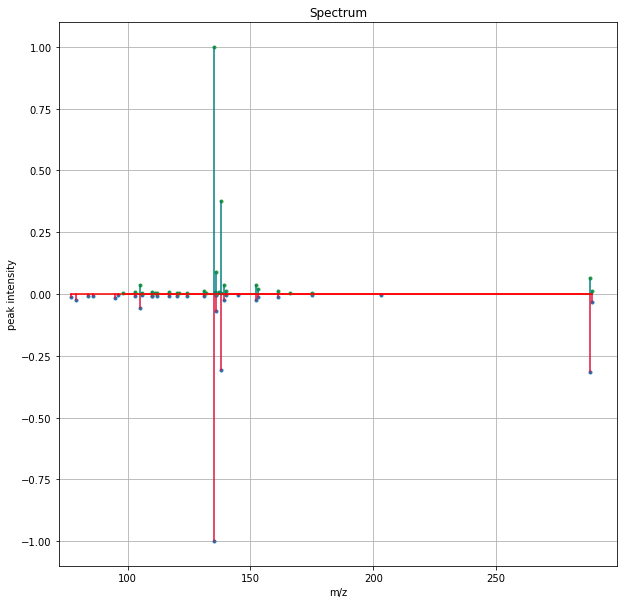

Number of peaks:  [31, 31]


In [219]:
id = 1000
ID1, ID2 = find_precursor_matches_confirmed[id][:2]

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

## Matches with higher cosine score only (cosine score > 0.85)

In [220]:
decimals = 2
cosine_threshold = 0.85
cosine_tol = 0.01

find_precursor_matches = []
find_precursor_matches_confirmed = []
find_precursor_matches_not_confirmed = []
find_target_matched = np.zeros((len(spectra)))

for i, pepmass in enumerate(target_mz):
    found_ones = np.where(allGNPS_mz == np.round(pepmass, decimals))[0]
    found_match = 0
    if len(found_ones) > 0:
        for one in found_ones:
            cosine_score = MS_functions.cosine_score(spectra_ref[i], spectra[one], tol = cosine_tol)[0]
            if cosine_score > cosine_threshold:
                found_match = 1
                find_precursor_matches_confirmed.append((i, one, cosine_score))
            else:
                find_precursor_matches_not_confirmed.append((i, one, cosine_score))
    else:
        pass
    find_precursor_matches.append(found_match)

print("Found spectra matches for", np.sum(np.array(find_precursor_matches)), "out of", len(spectra_ref), "spectra.")
found_IDX = np.where(np.array(find_precursor_matches) == 1)

print("Found total of", len(find_precursor_matches_confirmed), "cosine score confirmed matches.")

Found spectra matches for 6172 out of 9565 spectra.
Found total of 10255 cosine score confirmed matches.


In [221]:
id = 2000
ID1, ID2 = find_precursor_matches_confirmed[id][:2]
print(ID1,ID2)
print("pepmasses: ", spectra_ref[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("Smiles: ", spectra_ref[ID1].metadata['smiles'], "vs.: ", spectra[ID2].metadata['smiles'])
print("Inchikeys: ", spectra_ref[ID1].metadata['inchikey'], "vs.: ", spectra[ID2].metadata['inchikey'])

3007 11434
pepmasses:  370.17999 370.18
Smiles:  CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC vs.:  CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC
Inchikeys:  NTJOBXMMWNYJFB-UHFFFAOYSA-N vs.:  NTJOBXMMWNYJFB-UHFFFAOYSA-N


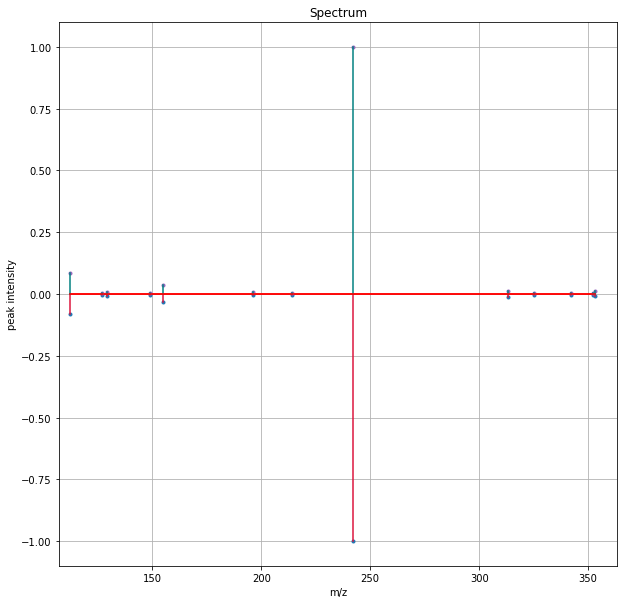

Number of peaks:  [13, 13]


In [222]:
id = 2000
ID1, ID2 = find_precursor_matches_confirmed[id][:2]

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

### Find matches based on inchikeys and smiles

In [224]:
# Compare allGNPS and uniquesmiles MGFs
inchikeys = []
for spec in spectra:
    inchikeys.append(spec.metadata['inchikey'])

inchikeys_ref = []
for spec in spectra_ref:
    inchikeys_ref.append(spec.metadata['inchikey'])

In [225]:
# Check if all got inchikey
test = [len(x) for x in inchikeys_ref]
np.where(np.array(test) != 27)[0]

array([], dtype=int64)

In [226]:
inchi_matches = []
for m, inchikey in enumerate(inchikeys_ref):
    if inchikey in inchikeys:
        #inchi_matches.append((m, inchikeys.index(inchikey)))
        matches = list(np.where(np.array(inchikeys) == inchikey)[0])
        inchi_matches.extend(list(zip(len(matches) * [m], matches)))

In [ ]:
# Compare allGNPS and uniquesmiles MGFs
smiles = []
for spec in spectra:
    smiles.append(spec.metadata['smiles'])

smiles_ref = []
for spec in spectra_ref:
    smiles_ref.append(spec.metadata['smiles'])

In [ ]:
smiles_matches = []
for m, smile in enumerate(smiles_ref):
    if smile in smiles:
        matches = list(np.where(np.array(smiles) == smile)[0])
        smiles_matches.extend(list(zip(len(matches) * [m], matches)))

In [ ]:
len(inchi_matches), len(smiles_matches)

In [ ]:
matches_inchikey_smiles = [x for x in inchi_matches or x in smiles_matches]
#len(list(set(matches_inchikey_smiles)))
len(matches_inchikey_smiles)

### Find matches based on inchikey AND cosine score

In [43]:
cosine_threshold = 0.7
cosine_tol = 0.01

matches_inchikey_cosine = []
for (x,y) in matches_inchikey_smiles:
    cosine_score = MS_functions.cosine_score(spectra_ref[x], spectra[y], tol = cosine_tol)[0]
    if cosine_score > cosine_threshold:
        matches_inchikey_cosine.append((x,y, cosine_score))

In [96]:
a,b,c = zip(*matches_inchikey_cosine)

In [99]:
print("Found total of", len(matches_inchikey_cosine), "matching spectra.")

Found total of 9670 matching spectra.


In [132]:
print("Found matches for", len(list(set(a))), "out of", len(spectra_ref), "spectra from unique_smiles.")

Found matches for 6462 out of 12414 spectra from unique_smiles.


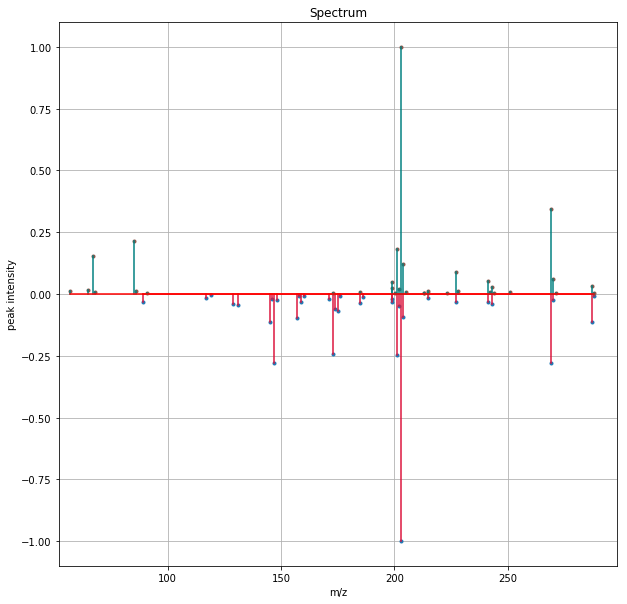

Number of peaks:  [34, 34]


In [51]:
ID1, ID2 = matches_inchikey_cosine[0][:2]
compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

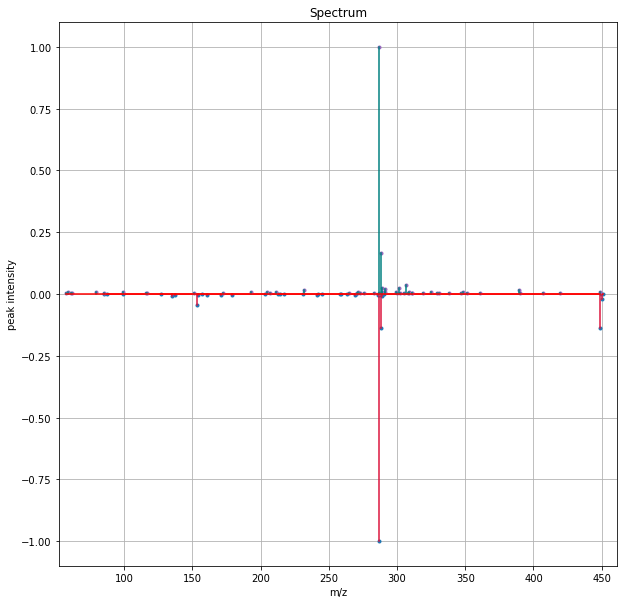

Number of peaks:  [43, 54]


In [113]:
ID1, ID2 = matches_inchikey_cosine[100][:2]
compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

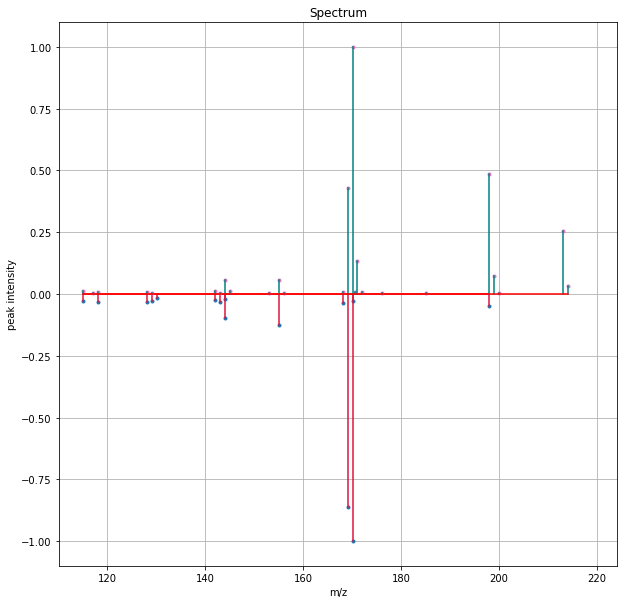

Number of peaks:  [15, 25]


In [54]:
ID1, ID2 = matches_inchikey_cosine[1000][:2]
compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

## More severe filtering based on cosine score

In [55]:
cosine_threshold = 0.85
cosine_tol = 0.01

matches_inchikey_cosine2 = []
for (x,y) in matches_inchikey_smiles:
    cosine_score = MS_functions.cosine_score(spectra_ref[x], spectra[y], tol = cosine_tol)[0]
    if cosine_score > cosine_threshold:
        matches_inchikey_cosine2.append((x,y, cosine_score))

In [114]:
a,b,c = zip(*matches_inchikey_cosine2)

In [115]:
print("Found total of", len(matches_inchikey_cosine2), "matching spectra.")

Found total of 8143 matching spectra.


In [116]:
print("Found matches for", len(list(set(a))), "out of", len(spectra_ref), "spectra.")

Found matches for 6266 out of 12414 spectra.


# Try to find VERY similar spectra only
### Find matches based on pepmass (+ cosine score)

In [109]:
# Compare allGNPS and uniquesmiles MGFs
decimals = 1

pepmasses = []
for spec in spectra_ref:
    pepmasses.append(spec.metadata['pepmass'][0])

target_mz = np.array(pepmasses)
target_mz  = np.round(target_mz, decimals)

pepmasses = []
for spec in spectra:
    pepmasses.append(spec.metadata['pepmass'][0])

allGNPS_mz = np.array(pepmasses)
allGNPS_mz  = np.round(allGNPS_mz, decimals)

### Machtes for equal pepmass (within 1 decimals) and cosine score > 0.9):

In [119]:
decimals = 1
cosine_threshold = 0.9
cosine_tol = 0.01

find_precursor_matches = []
find_precursor_matches_confirmed = []
find_precursor_matches_not_confirmed = []
find_target_matched = np.zeros((len(spectra)))

for i, pepmass in enumerate(target_mz):
    found_ones = np.where(np.round(allGNPS_mz, decimals) == np.round(pepmass, decimals))[0]
    found_match = 0
    if len(found_ones) > 0:
        for one in found_ones:
            cosine_score = MS_functions.cosine_score(spectra_ref[i], spectra[one], tol = cosine_tol)[0]
            if cosine_score > cosine_threshold:
                found_match = 1
                find_precursor_matches_confirmed.append((i, one, cosine_score))
            else:
                find_precursor_matches_not_confirmed.append((i, one, cosine_score))
    else:
        pass
    find_precursor_matches.append(found_match)

print("Found spectra matches for", np.sum(np.array(find_precursor_matches)), "out of", len(spectra_ref), "spectra.")
found_IDX = np.where(np.array(find_precursor_matches) == 1)

print("Found total of", len(find_precursor_matches_confirmed), "cosine score confirmed matches.")

Found spectra matches for 6462 out of 12414 spectra.
Found total of 10323 cosine score confirmed matches.


16 15154
pepmasses:  479.082 479.083
Smiles:  O[C@@H]1[C@@H](O)[C@H](O)[C@H](O[C@H]1OC2=C(OC3=C(C(O)=CC(O)=C3)C2=O)C4=CC(O)=C(O)C=C4)C(O)=O vs.:  OC(=O)C(O1)C(O)C(O)C(O)C1OC(C(=O)3)=C(Oc(c4)c(c(O)cc(O)4)3)c(c2)cc(O)c(O)c2
Inchikeys:  DUBCCGAQYVUYEU-ZUGPOPFOSA-N vs.:  DUBCCGAQYVUYEU-UHFFFAOYSA-N


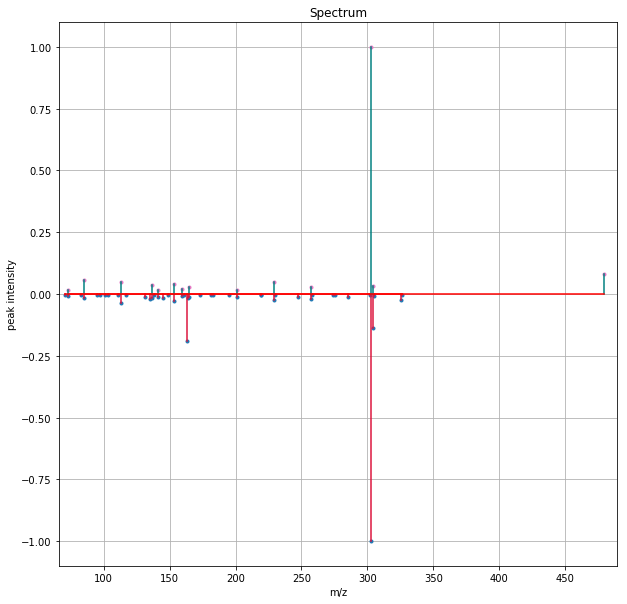

Number of peaks:  [45, 14]


In [120]:
id = 0
ID1, ID2 = find_precursor_matches_confirmed[id][:2]
print(ID1,ID2)
print("pepmasses: ", spectra_ref[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("Smiles: ", spectra_ref[ID1].metadata['smiles'], "vs.: ", spectra[ID2].metadata['smiles'])
print("Inchikeys: ", spectra_ref[ID1].metadata['inchikey'], "vs.: ", spectra[ID2].metadata['inchikey'])

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

988 53412
pepmasses:  271.06 271.06
Smiles:  OC1=CC(O)=C2C(=O)C=C(OC2=C1O)C3=CC=CC=C3 vs.:  N/A
Inchikeys:  ZFKKRRMUPBBYRS-UHFFFAOYSA-N vs.:  TZBJGXHYKVUXJN-UHFFFAOYSA-N


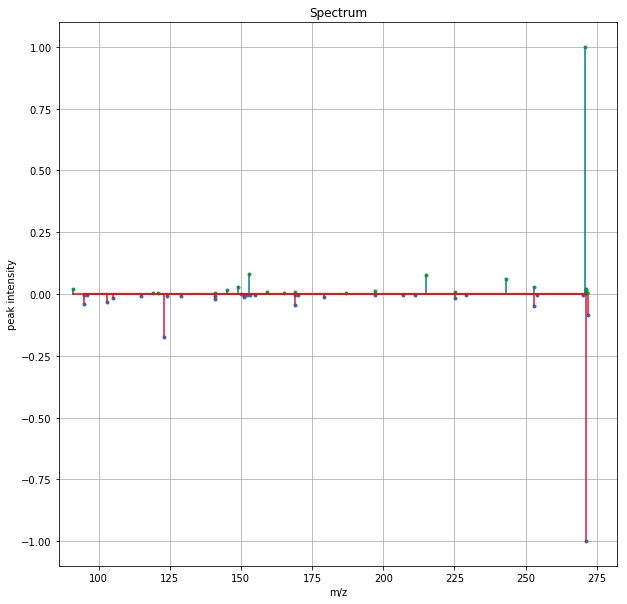

Number of peaks:  [31, 30]


In [121]:
id = 500
ID1, ID2 = find_precursor_matches_confirmed[id][:2]
print(ID1,ID2)
print("pepmasses: ", spectra_ref[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("Smiles: ", spectra_ref[ID1].metadata['smiles'], "vs.: ", spectra[ID2].metadata['smiles'])
print("Inchikeys: ", spectra_ref[ID1].metadata['inchikey'], "vs.: ", spectra[ID2].metadata['inchikey'])

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

3172 13662
pepmasses:  146.0 146.0
Smiles:  Oc(c1)c(c2)c(ccc2)nc1 vs.:  Oc(c1)c(c2)c(ccc2)nc1
Inchikeys:  PMZDQRJGMBOQBF-UHFFFAOYSA-N vs.:  PMZDQRJGMBOQBF-UHFFFAOYSA-N


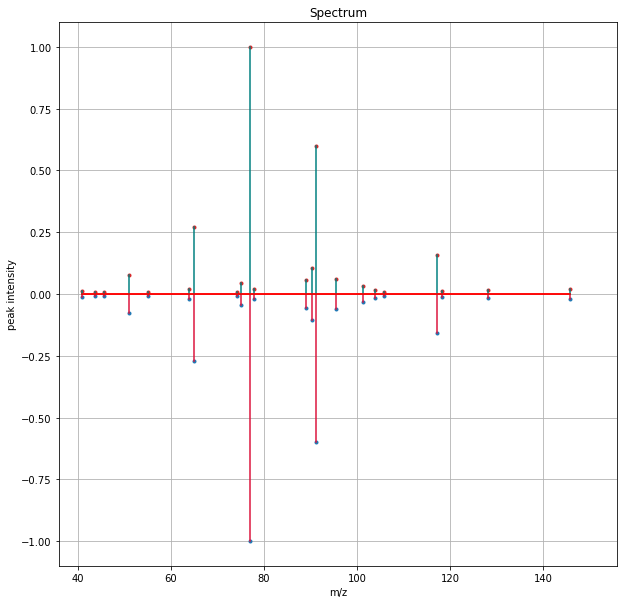

Number of peaks:  [22, 22]


In [122]:
id = 2000
ID1, ID2 = find_precursor_matches_confirmed[id][:2]
print(ID1,ID2)
print("pepmasses: ", spectra_ref[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("Smiles: ", spectra_ref[ID1].metadata['smiles'], "vs.: ", spectra[ID2].metadata['smiles'])
print("Inchikeys: ", spectra_ref[ID1].metadata['inchikey'], "vs.: ", spectra[ID2].metadata['inchikey'])

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

4287 15795
pepmasses:  187.075 187.075
Smiles:  COC1=C(C=O)C2=CC=CC=C2C=C1 vs.:  COC1=C(C=O)C2=CC=CC=C2C=C1
Inchikeys:  YIQGLTKAOHRZOL-UHFFFAOYSA-N vs.:  YIQGLTKAOHRZOL-UHFFFAOYSA-N


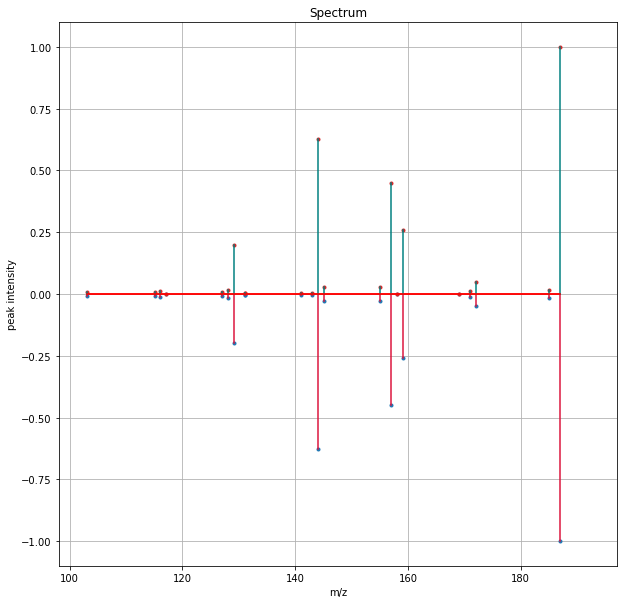

Number of peaks:  [22, 22]


In [123]:
id = 3000
ID1, ID2 = find_precursor_matches_confirmed[id][:2]
print(ID1,ID2)
print("pepmasses: ", spectra_ref[ID1].metadata['pepmass'][0], spectra[ID2].metadata['pepmass'][0])
print("Smiles: ", spectra_ref[ID1].metadata['smiles'], "vs.: ", spectra[ID2].metadata['smiles'])
print("Inchikeys: ", spectra_ref[ID1].metadata['inchikey'], "vs.: ", spectra[ID2].metadata['inchikey'])

compare_spectra(spectra_ref[ID1],spectra[ID2], min_mz = None, max_mz = None)

# Try to find VERY similar spectra only
### Find matches based on pepmass (+ cosine score) OR inchikey  (+ cosine score) 

### Machtes for equal pepmass (within 1 decimals) and cosine score > 0.9):

In [119]:
decimals = 1
cosine_threshold = 0.9
cosine_tol = 0.01

find_precursor_matches = []
find_precursor_matches_confirmed = []
find_precursor_matches_not_confirmed = []
find_target_matched = np.zeros((len(spectra)))

for i, pepmass in enumerate(target_mz):
    found_ones = np.where(np.round(allGNPS_mz, decimals) == np.round(pepmass, decimals))[0]
    found_match = 0
    if len(found_ones) > 0:
        for one in found_ones:
            cosine_score = MS_functions.cosine_score(spectra_ref[i], spectra[one], tol = cosine_tol)[0]
            if cosine_score > cosine_threshold:
                found_match = 1
                find_precursor_matches_confirmed.append((i, one, cosine_score))
            else:
                find_precursor_matches_not_confirmed.append((i, one, cosine_score))
    else:
        pass
    find_precursor_matches.append(found_match)

print("Found spectra matches for", np.sum(np.array(find_precursor_matches)), "out of", len(spectra_ref), "spectra.")
found_IDX = np.where(np.array(find_precursor_matches) == 1)

print("Found total of", len(find_precursor_matches_confirmed), "cosine score confirmed matches.")

Found spectra matches for 6462 out of 12414 spectra.
Found total of 10323 cosine score confirmed matches.


### Try adding matches from inchikey matches to check if this adds additional cases!

In [124]:
matches_inchikey_cosine = []
for (x,y) in matches_inchikey_smiles:
    cosine_score = MS_functions.cosine_score(spectra_ref[x], spectra[y], tol = cosine_tol)[0]
    if cosine_score > cosine_threshold:
        matches_inchikey_cosine.append((x,y, cosine_score))

In [128]:
matches_pepmass_confirmed = [(x,y) for (x,y,_) in find_precursor_matches_confirmed]
matches_inchikey_confirmed = [(x,y) for (x,y,_) in matches_inchikey_cosine]

matches_combined = [x for x in matches_pepmass_confirmed or x in matches_inchikey_confirmed]

In [129]:
a,b = zip(*matches_combined)

In [133]:
print("Found matches for", len(list(set(a))), "out of", len(spectra_ref), "spectra from unique_smiles.")

Found matches for 6462 out of 12414 spectra from unique_smiles.


## Note:
Detecting matches by Inchikeys does not deliver additional matching spectra pairs (when compared to search for pepmass).

In [138]:
no_match_spectra = [x for x in range(len(spectra_ref)) if not x in list(set(a))]

In [143]:
len(no_match_spectra) + len(list(set(a)))

12414

# COMBINE datasets

In [177]:
scans_no_match = []
for idx in no_match_spectra:
    scans_no_match.append(spectra_ref[idx].metadata['scans'])

smiles_no_match = []
for idx in no_match_spectra:
    smiles_no_match.append(spectra_ref[idx].metadata['smiles'])
    
inchikey_no_match = []
for idx in no_match_spectra:
    inchikey_no_match.append(spectra_ref[idx].metadata['inchikey'])

In [176]:
len(scans_no_match), len(inchikey_no_match), len(list(set(no_match_spectra)))

(5952, 5952, 5952)

In [181]:
test = [len(x) for x in smiles_no_match]
test[:10]

[46, 41, 59, 54, 56, 28, 31, 53, 38, 50]

In [175]:
len(list(set([x for x in scans_no_match or x in inchikey_no_match])))

3394

In [168]:
spectra_ref[0].metadata

{'title': 'Scan Number: 2',
 'pepmass': [330.11899, None],
 'charge': 1,
 'mslevel': '2',
 'filename': 'C3_GC3_01_2798.mzXML',
 'instrument': 'ion trap',
 'scans': '2',
 'smiles': 'CC(O)(C(O)COC(=O)\\C=C\\C1=CC(O)=C(O)C=C1)C(O)=O',
 'inchikey': 'RUEPXZDDWQCITK-HWKANZROSA-N',
 'feature_id': '1',
 'precursormass': 330.11899,
 'parentintensity': None,
 'parentmass': 329.1117135480092,
 'singlechargeprecursormass': 330.11899}

In [157]:
'41078' in scans_no_match

True

In [167]:
#Create MGF of not-machted spectra from unique smiles

mgf_file = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs.mgf"
file_name = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs_not_matched.mgf"

with mgf.read(mgf_file) as reader:
    for i, spectrum in enumerate(reader):  
        #if spectrum['params']['scans'] in scans_no_match:
        if spectrum['params']['filename'] in filename_no_match:
            mgf.write((spectrum,), file_name)

In [158]:
test = mgf.read(PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs_not_matched.mgf")
print(len(test))
test.close()

3394


In [159]:
spectrum['params']

{'title': 'Scan Number: 41078',
 'pepmass': (407.17099, None),
 'charge': [1],
 'mslevel': '2',
 'filename': 'A7_GA7_01_8204.mzXML',
 'instrument': 'ion trap',
 'scans': '41078',
 'smiles': 'CC1CCC\\23COC(=O)C2=C/C(O)CC3C1(C)CC/C4=C/C(=O)OC4O',
 'inchikey': 'FSXIRVCJYLNVMM-UHFFFAOYSA-N',
 'feature_id': '9508'}

In [153]:
#Combine speclibs dataset + not-machted spectra from unique smiles
mgf_file1 = PATH_MS_DATA + "GNPSLibraries_uniqueSMILES_withFeatureIDs_not_matched.mgf"
mgf_file2 = ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_191010_modified.mgf"

output_file= open(ROOT + "\\Data\\GNPS_all\\" + "all_gnps_with_smiles_combined_191014.mgf", 'w')

with open(mgf_file1 , 'r') as file:
    for line in file:
        output_file.write(line)
    #output_file.write('\n')
with open(mgf_file2 , 'r') as file:
    for line in file:
        output_file.write(line)